# Image Display <a href="https://mybinder.org/v2/gh/InsightSoftwareConsortium/SimpleITK-Notebooks/master?filepath=Python%2F04_Image_Display.ipynb"><img style="float: right;" src="https://mybinder.org/badge_logo.svg"></a>

The native SimpleITK approach to displaying images is to use an external viewing program. In the notebook environment it is convenient to use matplotlib to display inline images and if the need arises we can implement some reasonably rich inline graphical user interfaces, combining control components from the ipywidgets package and matplotlib based display.

In this notebook we cover the usage of external programs and matplotlib for viewing images. We also instantiate a more involved inline interface that uses ipywidgets to control display. For the latter type of moderately complex display, used in many of the notebooks, take a look at the [gui.py](gui.py) file.

In [9]:
import SimpleITK as sitk

%matplotlib inline
import matplotlib.pyplot as plt
import gui

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

## Image Display with An External Viewer

SimpleITK provides two options for invoking an external viewer, use a procedural interface or an object oriented one. 

### Procedural interface
SimpleITK provides a built in ``Show`` method. This function writes the image out to disk and than launches a program for visualization. By default it is configured to use the Fiji program, because it readily supports many medical image formats and loads quickly. However, the ``Show`` visualization program is easily customizable via environment variables:

<ul>
<li>SITK_SHOW_COMMAND: Viewer to use (<a href="http://www.itksnap.org">ITK-SNAP</a>, <a href="http://www.slicer.org">3D Slicer</a>...) </li>
<li>SITK_SHOW_COLOR_COMMAND: Viewer to use when displaying color images.</li>
<li>SITK_SHOW_3D_COMMAND: Viewer to use for 3D images.</li>
</ul>

In general, the Show command accepts three parameters: (1) image to display; (2) window title; (3) boolean specifying whether to print the invoked command and additional debugging information.

In [10]:
mr_image = sitk.ReadImage(fdata("training_001_mr_T1.mha"))

Fetching training_001_mr_T1.mha


In [11]:
?sitk.Show

Signature: sitk.Show(*args, **kwargs)
Docstring:
Show(Image image, std::string const & title="", bool const debugOn=itk::simple::ProcessObject::GetGlobalDefaultDebug())


Display an image in an external viewer (Fiji by default)

This function directly calls the execute method of ImageViewer in order to support a procedural API
File:      ~/miniconda3/envs/pytorch/lib/python3.8/site-packages/SimpleITK/SimpleITK.py
Type:      function


In [12]:
%env SITK_SHOW_COMMAND /Applications/Slicer.app/Contents/MacOS/Slicer

env: SITK_SHOW_COMMAND=/Applications/Slicer.app/Contents/MacOS/Slicer


In [13]:
try:
    sitk.Show(mr_image)
except RuntimeError:
    print(
        "SimpleITK Show method could not find the viewer (ImageJ not installed or "
        + "environment variable pointing to non existant viewer)."
    )

SimpleITK Show method could not find the viewer (ImageJ not installed or environment variable pointing to non existant viewer).


Use a different viewer by setting environment variable(s). Do this from within your Jupyter notebook using 'magic' functions, or set in a more permanent manner using your OS specific convention. 

In [ ]:
%env SITK_SHOW_COMMAND /Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP

try:
    sitk.Show(mr_image)
except RuntimeError:
    print(
        "SimpleITK Show method could not find the viewer (ITK-SNAP not installed or "
        + "environment variable pointing to non existant viewer)."
    )

In [17]:
%env SITK_SHOW_COMMAND /Applications/Slicer.app/Contents/MacOS/Slicer
try:
    sitk.Show(mr_image)
except RuntimeError:
    print(
        "SimpleITK Show method could not find the viewer (Slicer not installed or "
        + "environment variable pointing to non existant viewer)."
    )

env: SITK_SHOW_COMMAND=/Applications/Slicer.app/Contents/MacOS/Slicer
SimpleITK Show method could not find the viewer (Slicer not installed or environment variable pointing to non existant viewer).


### Object Oriented interface

The [Image Viewer](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ImageViewer.html) class provides a more standard approach to controlling image viewing by setting various instance variable values. Also, it ensures that all of your viewing settings are documented, as they are part of the code and not external environment variables.

A caveat to this is that if you have set various environment variables to control SimpleITK settings, the image viewer will use these settings as the default ones and not the standard defaults (Fiji as viewer etc.).

In [18]:
# Which external viewer will the image_viewer use if we don't specify the external viewing application?
# (see caveat above)
image_viewer = sitk.ImageViewer()
image_viewer.SetApplication("/Applications/Slicer.app/Contents/MacOS/Slicer")
image_viewer.SetTitle("MR image")

# Use the default image viewer.
image_viewer.Execute(mr_image)

# # Change viewer, and display again.
# image_viewer.SetApplication("/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP")
# image_viewer.Execute(mr_image)

# # Change the viewer command, (use ITK-SNAP -z option to open the image in zoomed mode)
# image_viewer.SetCommand("/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP -z 3")
# image_viewer.Execute(mr_image)

print(
    "Default format for saved file used in display: " + image_viewer.GetFileExtension()
)

# Change the file format (possibly to make it compatible with your viewer of choice)
image_viewer.SetFileExtension(".nrrd")
image_viewer.Execute(mr_image)

Default format for saved file used in display: .mha


Populating font family aliases took 1468 ms. Replace uses of missing font family ".SF NS Text" with one that exists to avoid this cost. 
Populating font family aliases took 1500 ms. Replace uses of missing font family ".SF NS Text" with one that exists to avoid this cost. 


Switch to module:  "Welcome"
Switch to module:  "Welcome"
Local filepath received via command-line:  "/tmp/MRimage-3476-8.mha"
Loaded volume from file: /tmp/MRimage-3476-8.mha. Dimensions: 256x256x26. Number of components: 1. Pixel type: short.


Local filepath received via command-line:  "/tmp/MRimage-3476-9.nrrd"
Loaded volume from file: /tmp/MRimage-3476-9.nrrd. Dimensions: 256x256x26. Number of components: 1. Pixel type: short.


"Volume" Reader has successfully read the file "/tmp/MRimage-3476-8.mha" "[0.25s]"
"Volume" Reader has successfully read the file "/tmp/MRimage-3476-9.nrrd" "[0.15s]"


## Inline display with matplotlib

Fetching training_001_mr_T1.mha


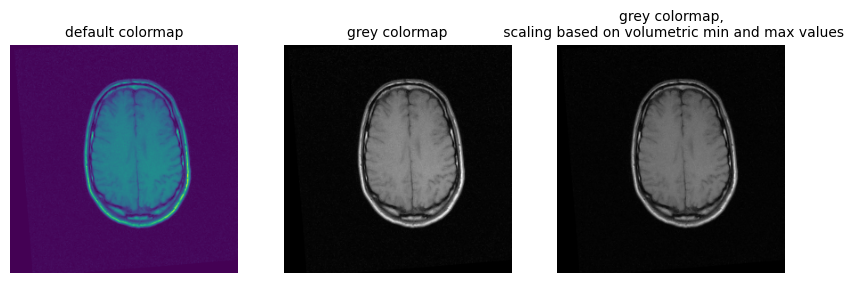

In [19]:
mr_image = sitk.ReadImage(fdata("training_001_mr_T1.mha"))
npa = sitk.GetArrayViewFromImage(mr_image)

# Display the image slice from the middle of the stack, z axis
z = int(mr_image.GetDepth() / 2)
npa_zslice = sitk.GetArrayViewFromImage(mr_image)[z, :, :]

# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure(figsize=(10, 3))

fig.add_subplot(1, 3, 1)
plt.imshow(npa_zslice)
plt.title("default colormap", fontsize=10)
plt.axis("off")

fig.add_subplot(1, 3, 2)
plt.imshow(npa_zslice, cmap=plt.cm.Greys_r)
plt.title("grey colormap", fontsize=10)
plt.axis("off")

fig.add_subplot(1, 3, 3)
plt.title(
    "grey colormap,\n scaling based on volumetric min and max values", fontsize=10
)
plt.imshow(npa_zslice, cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis("off");

Image spacing: (1.25, 1.25, 4.0)


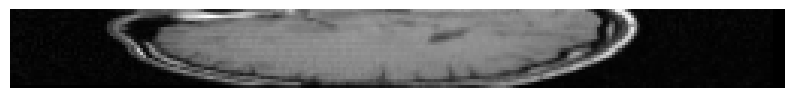

In [20]:
# Display the image slice in the middle of the stack, x axis

x = int(mr_image.GetWidth() / 2)

npa_xslice = npa[:, :, x]
plt.figure(figsize=(10, 2))
plt.imshow(npa_xslice, cmap=plt.cm.Greys_r)
plt.axis("off")

print(f"Image spacing: {mr_image.GetSpacing()}")

Image spacing: (1.25, 1.25)


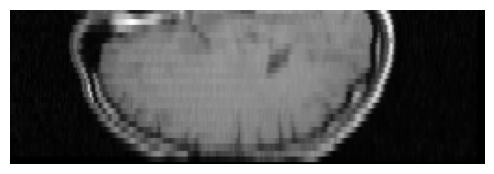

In [21]:
# Collapse along the x axis
extractSliceFilter = sitk.ExtractImageFilter()
size = list(mr_image.GetSize())
size[0] = 0
extractSliceFilter.SetSize(size)

index = (x, 0, 0)
extractSliceFilter.SetIndex(index)
sitk_xslice = extractSliceFilter.Execute(mr_image)

# Resample slice to isotropic
original_spacing = sitk_xslice.GetSpacing()
original_size = sitk_xslice.GetSize()

min_spacing = min(sitk_xslice.GetSpacing())
new_spacing = [min_spacing, min_spacing]
new_size = [
    int(round(original_size[0] * (original_spacing[0] / min_spacing))),
    int(round(original_size[1] * (original_spacing[1] / min_spacing))),
]
resampleSliceFilter = sitk.ResampleImageFilter()
resampleSliceFilter.SetSize(new_size)
resampleSliceFilter.SetTransform(sitk.Transform())
resampleSliceFilter.SetInterpolator(sitk.sitkNearestNeighbor)
resampleSliceFilter.SetOutputOrigin(sitk_xslice.GetOrigin())
resampleSliceFilter.SetOutputSpacing(new_spacing)
resampleSliceFilter.SetOutputDirection(sitk_xslice.GetDirection())
resampleSliceFilter.SetDefaultPixelValue(0)
resampleSliceFilter.SetOutputPixelType(sitk_xslice.GetPixelID())

# Why is the image pixelated?
sitk_isotropic_xslice = resampleSliceFilter.Execute(sitk_xslice)
plt.figure(figsize=(10, 2))
plt.imshow(sitk.GetArrayViewFromImage(sitk_isotropic_xslice), cmap=plt.cm.Greys_r)
plt.axis("off")
print(f"Image spacing: {sitk_isotropic_xslice.GetSpacing()}")

## Inline display with matplotlib and ipywidgets

Display two volumes side by side, with sliders to control the displayed slice. The menu on the bottom left allows you to home (return to original view), back and forward between views, pan, zoom and save a view. 

A variety of interfaces combining matplotlib display and ipywidgets can be found in the [gui.py](gui.py) file.


In [22]:
ct_image = sitk.ReadImage(fdata("training_001_ct.mha"))
ct_window_level = [720, 80]
mr_window_level = [790, 395]

Fetching training_001_ct.mha


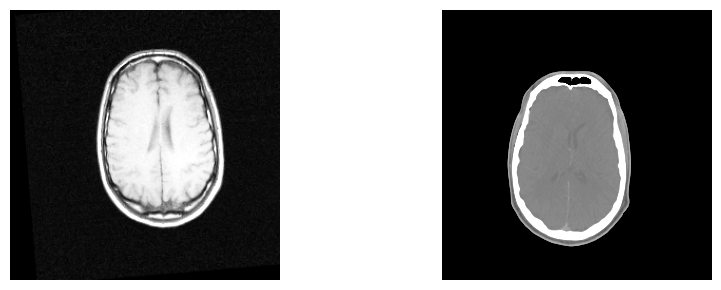

In [23]:
gui.MultiImageDisplay(
    [mr_image, ct_image],
    figure_size=(10, 3),
    window_level_list=[mr_window_level, ct_window_level],
); # NOT WORKING